In [3]:

# 비지도학습(데이터에 label,target, 종속변수가 없는 경우)에 대해서 알아보아요!
# 가장 대표적인 알고리즘은 K-means 알고리즘
# 이 K-means알고리즘은 EM 알고리즘으로 동작해요!
# EM의 E (Expectation)의 의미로 가장 가까운 centroid에 데이터를 군집으로 할당.
# EM의 M (Maximization)의 의미로 cluster경계에 대한 중심점(centroids)를 결정

# cluster의 경계가 변하지 않을때까지 반복해서 처리
# 초기 centoroids의 선택에 따라 다르게 cluster가 생성될 수 있음
# 어떤 경우는 좋고, 어떤 경우는 나쁨
# 여러번 시도해서 가장 좋은 경우를 결과로 사용

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 중심점이 4개인 100개의 랜덤 데이터를 생성해요!
# n_samples : 전체 데이터 포인트의 수
# centers : 클러스트의 수
# n_features : 각 데이터 포인트의 feature개수(데이터의 차원)
# random_state : 랜덤값을 생성하기 위한 seed값. (난수의 재현율을 보장하기 위해)
# points : 생성된 데이터의 feature
# labels : 각 데이터의 포인트의 소속 클러스터 레이블

(100, 2)


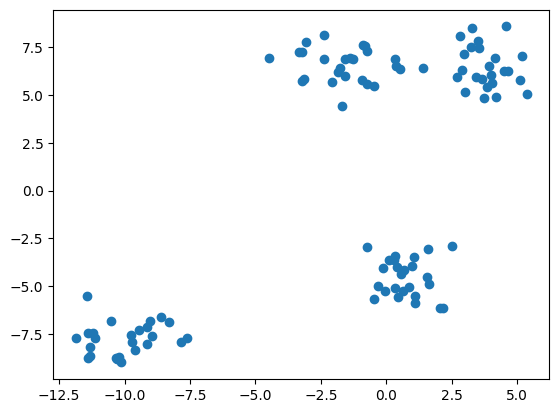

In [4]:
# 데이터부터 만들어요. 랜덤하게 생성할꺼예요!
# 군집형태로 되어있는 랜덤데이터를 생성할꺼예요!

points, labels =  make_blobs(n_samples=100,
                             centers=4,
                             n_features=2,
                             random_state=100)

print(points.shape) # (100, 2)
# print(points)
# print(labels)

# 랜덤으로 생성된 데이터를 2차원 평면에 scatter를 이용해서
# 표현해 보아요!
plt.scatter(points[:,0], points[:,1])
plt.show()

In [5]:
# k-means는 hyperparameter가 k값. 클러스터의 개수.
# n_init : k-means알고리즘을 여러번 실행해 가장 좋은 경우를 선택
#          초기값은 10. 과거에는 이 값을 우리가 설정했는데
#          왠만하면 auto라는 값으로 설정하는게 좋아요!
kmeans_cluster = KMeans(n_clusters=4,
                        n_init='auto',
                        random_state=100)

# 모델이 만들어졌으니 이제 학습을 해야 겠죠.
kmeans_cluster.fit(points)

# labels_ : 클러스터값.
print(kmeans_cluster.labels_)

[0 3 3 1 1 0 0 2 1 2 1 1 0 2 0 2 3 3 3 2 2 2 2 1 0 3 2 3 2 0 0 0 0 2 3 2 2
 3 1 2 0 3 1 3 2 2 3 3 0 1 0 2 1 3 0 0 2 3 3 2 0 1 2 0 0 1 2 1 2 0 1 3 1 0
 2 3 3 3 1 0 1 1 1 3 0 2 1 1 2 3 1 3 3 0 1 0 1 3 0 1]


c:\Users\user\anaconda3\envs\test_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


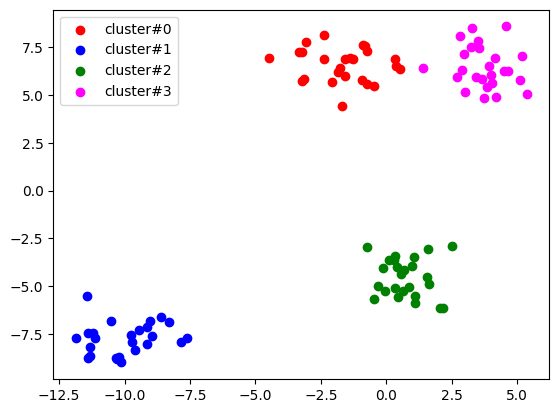

In [6]:
# clustering한 결과를 시각화!

my_color = {0: 'red', 1: 'blue', 2: 'green', 3: 'magenta'}

# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(4):
    cluster_sub_points = points[kmeans_cluster.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

In [7]:
# predict

new_point = np.array([[0.0, 0.0]])

result_cluster = kmeans_cluster.predict(new_point)

print(result_cluster) # [2]

[2]


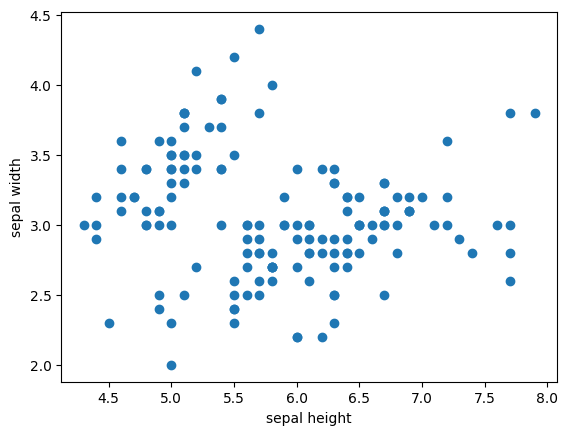

In [8]:
# 랜덤데이터를 이용해서 K-means 알고리즘이 동작하는걸
# 확인해봤어요!

# 우리가 알고있는 데이터를 한번 이용해 보아요!
# Iris(붓꽃데이터)를 이용해서 clustering을 해 보아요!

# Iris data는
# 독립변수가 4개예요. 꽃받침길이, 꽃받침의 너비, 꽃잎의 길이와 너비
# 종속변수가 있어요! 3가지 종류가 있어요 => 다중분류예제로 많이 사용.

# 독립변수를 4개 사용하면 2차원평면에 그림을 그릴수가 없어요!
# 2차원 평면에 클러스터링이 된 결과를 확인하기 위해
# 꽃받침길이, 꽃받침의 너비 두개의 feature만 사용해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
sample = iris.data

# 일단 그래프를 한번 그려 보아요!
x = sample[:,0]
y = sample[:,1]
plt.scatter(x,y)
plt.xlabel('sepal height')
plt.ylabel('sepal width')
plt.show()

c:\Users\user\anaconda3\envs\test_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


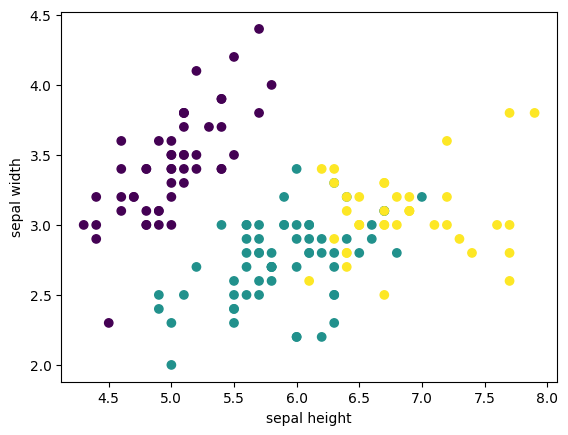

In [9]:
model = KMeans(n_clusters=3,
               n_init='auto')

# 학습을 진행
model.fit(sample)

# predict()를 이용해서 예측을 해 보아요!
labels = model.predict(sample)

# print(labels)
x = sample[:,0]
y = sample[:,1]
plt.scatter(x,y, c=labels)
plt.xlabel('sepal height')
plt.ylabel('sepal width')
plt.show()

(100, 2)
[1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0]


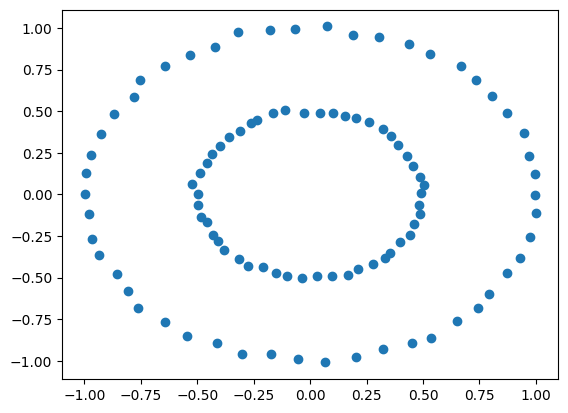

In [16]:
# Iris Data Set으로  clustering이 되는걸 확인해 봤어요!
# 잘 동작하는거 같아요!
# 왠만한 clustering을 위한 학습과 예측은 K-Means알고리즘으로 해결 가능!

# 그런데 문제가 하나 있어요!
# 주어진 데이터의 분포에 따라서 의도치 찮은 상황이 발생할 수 있어요!
# 알고리즘의 특성때문에 그래요!

# 이런 형태(K-Means로 clustering이 잘 되지 않는 경우)는 크게
# 3가지가 존재해요!

# 1. 데이터가 원형 데이터인 경우에는 KMeans가 정상적으로 동작하지 않아요!
# 예를 들어 보아요!

# 원형으로 되어 있는 데이터를 확보하기 위해 sklearn을 이용
from sklearn.datasets import make_circles

# 이 함수는 두개의 원으로 이루어진 데이터를 생성해요!
# n_samples : 데이터의 총 개수
# factor : 값이 0에 가까울 수록 두 원의 거리가 멀어져요
#          1에 가까울수록 두 원의 거리가 가까워요!
# noise :  데이터에 추가되는 무작위 노이즈의 양
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)

print(circle_points.shape)  # (100, 2)
print(circle_labels)

plt.scatter(circle_points[:,0], circle_points[:,1])
plt.show()

c:\Users\user\anaconda3\envs\test_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


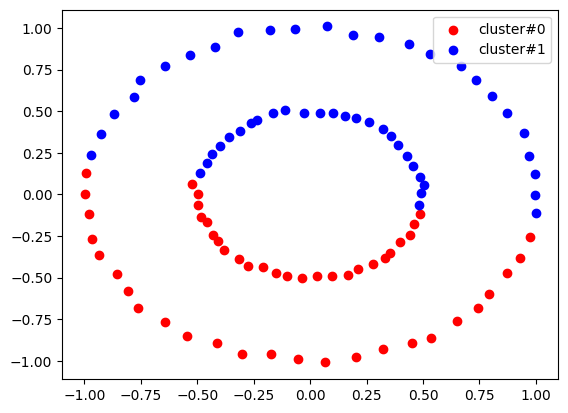

In [17]:
circle_model = KMeans(n_clusters=2,
                      n_init='auto')

circle_model.fit(circle_points)

my_color = {0: 'red', 1: 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = circle_points[circle_model.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

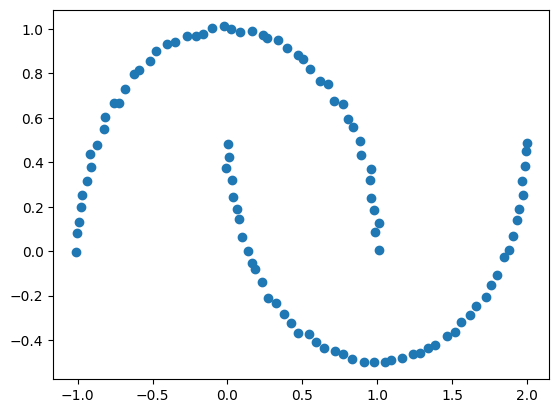

In [ ]:
# 결과를 확인했더니...원형데이터 분포는 K-means 알고리즘이
# 잘 동작하지 않아요! 클러스터를 정상적으로 나누지 않는거 같아요!

# 또 다른 경우를 알아보죠. 두번째예요!
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)

plt.scatter(moon_points[:,0], moon_points[:,1])
plt.show()

c:\Users\user\anaconda3\envs\test_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


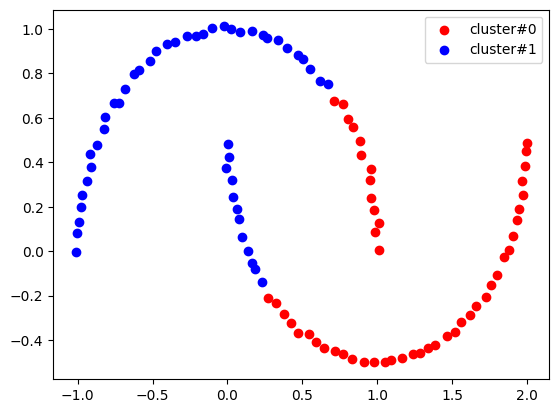

In [ ]:
moon_model = KMeans(n_clusters=2,
                      n_init='auto')

moon_model.fit(moon_points)

my_color = {0: 'red', 1: 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = moon_points[moon_model.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

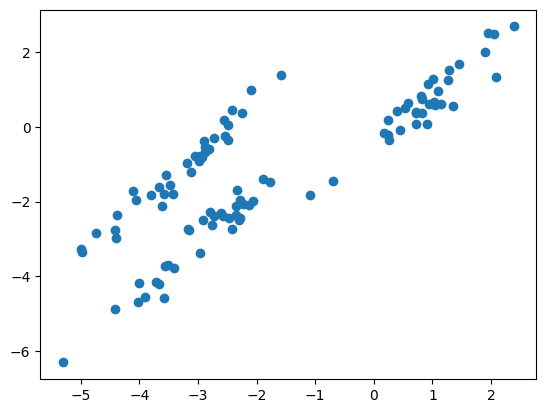

In [ ]:
# 세번째 데이터 분포예요!
# 대각선 모양의 데이터에 대해 클러스터링이 잘 되지 않아요!

from sklearn.datasets import make_blobs

diag_points, _ = make_blobs(n_samples=100,
                            random_state=170)

# 대각행렬을 이용해서 데이터를 대각선 분포로 변형
transfomation = [[0.6, 0.6],
                 [-0.4, -0.8]]

diag = np.dot(diag_points, transfomation)

plt.scatter(diag[:,0], diag[:,1])
plt.show()

c:\Users\user\anaconda3\envs\test_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


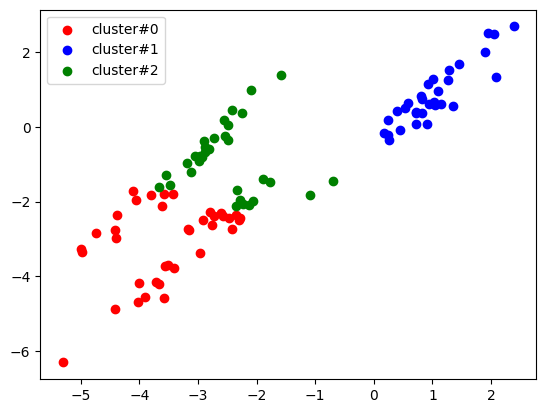

In [ ]:
diag_model = KMeans(n_clusters=3,
                    n_init='auto')

diag_model.fit(diag)

my_color = {0: 'red', 1: 'blue', 2: 'green'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(3):
    cluster_sub_points = diag[diag_model.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()